# 📁 Company Data Cleaning & Enrichment Project
This Jupyter Notebook performs profiling, cleansing, deduplication, and enrichment of company records using the Companies House API.

Imports tools for data processing, text matching, API calls, charting, and file saving, and sets Pandas to show all columns.

In [ ]:
import pandas as pd
import re
from fuzzywuzzy import fuzz
from tqdm.notebook import tqdm
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter.filedialog import asksaveasfilename

pd.set_option('display.max_columns', None)

Loads a CSV file into a DataFrame, makes a copy for processing, and displays the first few rows.

In [ ]:

file_path = r"C:\Users\Hp\Desktop\File\Company.csv"
df_raw = pd.read_csv(file_path)
df = df_raw.copy()
df.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,DissolutionDate,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Returns.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,PreviousName_1.CONDATE,PreviousName_1.CompanyName,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,BULLDOG MINI SKIPS LTD,15330909,NaN,NaN,"YARD 1, ARNOCK BUNGALOW",SOUTHEND ARTERIAL ROAD,BRENTWOOD,NaN,UNITED KINGDOM,CM13 3TB,Private Limited Company,Active,United Kingdom,NaN,06/12/2023,31.0,12,06/09/2025,NaN,NO ACCOUNTS FILED,03/01/2025,NaN,0.0,0.0,0.0,0,38110 - Collection of non-hazardous waste,43999 - Other specialised construction activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/15330909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/12/2024,NaN
1,BULLDOG LIMITED,9043007,NaN,NaN,FORESTERS COTTAGE,STONEY HEATH,BASINGSTOKE,HAMPSHIRE,NaN,RG26 5SW,Private Limited Company,Active,United Kingdom,NaN,16/05/2014,31.0,3,31/12/2024,31/03/2023,TOTAL EXEMPTION FULL,13/06/2017,16/05/2016,0.0,0.0,0.0,0,68209 - Other letting and operating of own or ...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/09043007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/05/2025,16/05/2024
2,BULLDOG MUSHROOMS LTD,8465312,NaN,NaN,C58-59 NEW COVENT GARDEN MARKET,NINE ELMS LANE,NaN,NaN,NaN,SW8 5JJ,Private Limited Company,Active,United Kingdom,NaN,28/03/2013,29.0,4,29/01/2025,30/04/2023,MICRO ENTITY,25/04/2017,28/03/2016,0.0,0.0,0.0,0,46310 - Wholesale of fruit and vegetables,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/08465312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2025,28/03/2024
3,BULLDOG MUSICAL ENTERTAINMENTS LIMITED,1652098,NaN,NaN,5 RAVENSFIELD GARDENS,STONELEIGH,SURREY,NaN,NaN,KT19 0ST,Private Limited Company,Active,United Kingdom,NaN,16/07/1982,31.0,3,31/12/2024,31/03/2023,MICRO ENTITY,15/01/2017,18/12/2015,0.0,0.0,0.0,0,90030 - Artistic creation,93290 - Other amusement and recreation activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/01652098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2025,18/12/2023
4,BULLDOG NETWORK (BOURNEMOUTH) LIMITED,4667818,NaN,NaN,"FRP ADVISORY TRADING LIMITED, MOUNTBATTEN HOUSE",GROSVENOR SQUARE,SOUTHAMPTON,NaN,NaN,SO15 2RP,Private Limited Company,Liquidation,United Kingdom,NaN,17/02/2003,31.0,3,31/12/2021,31/03/2020,TOTAL EXEMPTION FULL,17/03/2017,17/02/2016,2.0,2.0,0.0,0,47710 - Retail sale of clothing in specialised...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/04667818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/02/2022,25/01/2021


Profiles the dataset by showing its size, column names, missing values, sample rows, and a heatmap of missing data.

📊 Basic Profiling:
Shape: (307, 55)
Columns: ['CompanyName', ' CompanyNumber', 'RegAddress.CareOf', 'RegAddress.POBox', 'RegAddress.AddressLine1', ' RegAddress.AddressLine2', 'RegAddress.PostTown', 'RegAddress.County', 'RegAddress.Country', 'RegAddress.PostCode', 'CompanyCategory', 'CompanyStatus', 'CountryOfOrigin', 'DissolutionDate', 'IncorporationDate', 'Accounts.AccountRefDay', 'Accounts.AccountRefMonth', 'Accounts.NextDueDate', 'Accounts.LastMadeUpDate', 'Accounts.AccountCategory', 'Returns.NextDueDate', 'Returns.LastMadeUpDate', 'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding', 'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied', 'SICCode.SicText_1', 'SICCode.SicText_2', 'SICCode.SicText_3', 'SICCode.SicText_4', 'LimitedPartnerships.NumGenPartners', 'LimitedPartnerships.NumLimPartners', 'URI', 'PreviousName_1.CONDATE', ' PreviousName_1.CompanyName', ' PreviousName_2.CONDATE', ' PreviousName_2.CompanyName', 'PreviousName_3.CONDATE', ' PreviousName_3.CompanyNam

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,DissolutionDate,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Returns.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,PreviousName_1.CONDATE,PreviousName_1.CompanyName,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,BULLDOG MINI SKIPS LTD,15330909,NaN,NaN,"YARD 1, ARNOCK BUNGALOW",SOUTHEND ARTERIAL ROAD,BRENTWOOD,NaN,UNITED KINGDOM,CM13 3TB,Private Limited Company,Active,United Kingdom,NaN,06/12/2023,31.0,12,06/09/2025,NaN,NO ACCOUNTS FILED,03/01/2025,NaN,0.0,0.0,0.0,0,38110 - Collection of non-hazardous waste,43999 - Other specialised construction activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/15330909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/12/2024,NaN
1,BULLDOG LIMITED,9043007,NaN,NaN,FORESTERS COTTAGE,STONEY HEATH,BASINGSTOKE,HAMPSHIRE,NaN,RG26 5SW,Private Limited Company,Active,United Kingdom,NaN,16/05/2014,31.0,3,31/12/2024,31/03/2023,TOTAL EXEMPTION FULL,13/06/2017,16/05/2016,0.0,0.0,0.0,0,68209 - Other letting and operating of own or ...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/09043007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/05/2025,16/05/2024
2,BULLDOG MUSHROOMS LTD,8465312,NaN,NaN,C58-59 NEW COVENT GARDEN MARKET,NINE ELMS LANE,NaN,NaN,NaN,SW8 5JJ,Private Limited Company,Active,United Kingdom,NaN,28/03/2013,29.0,4,29/01/2025,30/04/2023,MICRO ENTITY,25/04/2017,28/03/2016,0.0,0.0,0.0,0,46310 - Wholesale of fruit and vegetables,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/08465312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2025,28/03/2024
3,BULLDOG MUSICAL ENTERTAINMENTS LIMITED,1652098,NaN,NaN,5 RAVENSFIELD GARDENS,STONELEIGH,SURREY,NaN,NaN,KT19 0ST,Private Limited Company,Active,United Kingdom,NaN,16/07/1982,31.0,3,31/12/2024,31/03/2023,MICRO ENTITY,15/01/2017,18/12/2015,0.0,0.0,0.0,0,90030 - Artistic creation,93290 - Other amusement and recreation activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/01652098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2025,18/12/2023
4,BULLDOG NETWORK (BOURNEMOUTH) LIMITED,4667818,NaN,NaN,"FRP ADVISORY TRADING LIMITED, MOUNTBATTEN HOUSE",GROSVENOR SQUARE,SOUTHAMPTON,NaN,NaN,SO15 2RP,Private Limited Company,Liquidation,United Kingdom,NaN,17/02/2003,31.0,3,31/12/2021,31/03/2020,TOTAL EXEMPTION FULL,17/03/2017,17/02/2016,2.0,2.0,0.0,0,47710 - Retail sale of clothing in specialised...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/04667818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/02/2022,25/01/2021


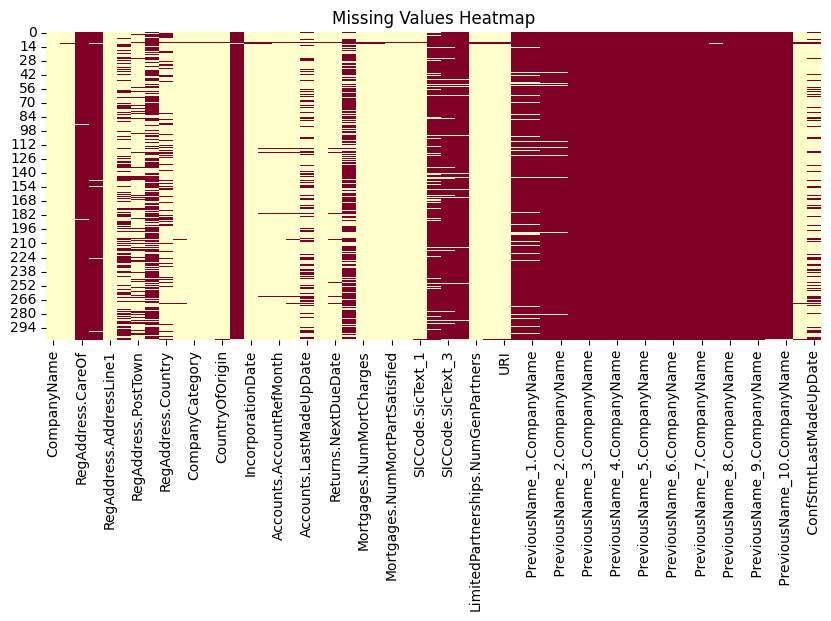

In [ ]:
def profile_data(df):
    print("📊 Basic Profiling:")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    display(df.head())

    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
    plt.title("Missing Values Heatmap")
    plt.show()

profile_data(df)

Cleans company names by removing spaces, punctuation, converting to uppercase, dropping blanks and duplicates.

In [ ]:
def clean_data(df):
    df['CompanyName'] = df['CompanyName'].astype(str).str.strip().str.upper()
    df = df.dropna(subset=['CompanyName'])
    df['CompanyName'] = df['CompanyName'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df = df.drop_duplicates(subset=['CompanyName'])
    return df

df = clean_data(df)
df.head()

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,DissolutionDate,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Returns.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,PreviousName_1.CONDATE,PreviousName_1.CompanyName,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,BULLDOG MINI SKIPS LTD,15330909,NaN,NaN,"YARD 1, ARNOCK BUNGALOW",SOUTHEND ARTERIAL ROAD,BRENTWOOD,NaN,UNITED KINGDOM,CM13 3TB,Private Limited Company,Active,United Kingdom,NaN,06/12/2023,31.0,12,06/09/2025,NaN,NO ACCOUNTS FILED,03/01/2025,NaN,0.0,0.0,0.0,0,38110 - Collection of non-hazardous waste,43999 - Other specialised construction activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/15330909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/12/2024,NaN
1,BULLDOG LIMITED,9043007,NaN,NaN,FORESTERS COTTAGE,STONEY HEATH,BASINGSTOKE,HAMPSHIRE,NaN,RG26 5SW,Private Limited Company,Active,United Kingdom,NaN,16/05/2014,31.0,3,31/12/2024,31/03/2023,TOTAL EXEMPTION FULL,13/06/2017,16/05/2016,0.0,0.0,0.0,0,68209 - Other letting and operating of own or ...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/09043007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/05/2025,16/05/2024
2,BULLDOG MUSHROOMS LTD,8465312,NaN,NaN,C58-59 NEW COVENT GARDEN MARKET,NINE ELMS LANE,NaN,NaN,NaN,SW8 5JJ,Private Limited Company,Active,United Kingdom,NaN,28/03/2013,29.0,4,29/01/2025,30/04/2023,MICRO ENTITY,25/04/2017,28/03/2016,0.0,0.0,0.0,0,46310 - Wholesale of fruit and vegetables,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/08465312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2025,28/03/2024
3,BULLDOG MUSICAL ENTERTAINMENTS LIMITED,1652098,NaN,NaN,5 RAVENSFIELD GARDENS,STONELEIGH,SURREY,NaN,NaN,KT19 0ST,Private Limited Company,Active,United Kingdom,NaN,16/07/1982,31.0,3,31/12/2024,31/03/2023,MICRO ENTITY,15/01/2017,18/12/2015,0.0,0.0,0.0,0,90030 - Artistic creation,93290 - Other amusement and recreation activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/01652098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2025,18/12/2023
4,BULLDOG NETWORK BOURNEMOUTH LIMITED,4667818,NaN,NaN,"FRP ADVISORY TRADING LIMITED, MOUNTBATTEN HOUSE",GROSVENOR SQUARE,SOUTHAMPTON,NaN,NaN,SO15 2RP,Private Limited Company,Liquidation,United Kingdom,NaN,17/02/2003,31.0,3,31/12/2021,31/03/2020,TOTAL EXEMPTION FULL,17/03/2017,17/02/2016,2.0,2.0,0.0,0,47710 - Retail sale of clothing in specialised...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/04667818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/02/2022,25/01/2021


Removes duplicate company names by comparing similarity using fuzzy matching with a threshold score.

In [ ]:
from fuzzywuzzy import fuzz
from tqdm import tqdm

def fuzzy_deduplication(df, threshold=90):
    if 'CompanyName' not in df.columns:
        raise KeyError("'CompanyName' column not found in the DataFrame.")
    
    to_drop = set()
    names = df['CompanyName'].tolist()
    
    for i in tqdm(range(len(names)), desc="Fuzzy deduplicating"):
        for j in range(i + 1, len(names)):
            if j in to_drop:
                continue
            score = fuzz.token_sort_ratio(str(names[i]).lower(), str(names[j]).lower())
            if score > threshold:
                to_drop.add(j)
    
    return df.drop(df.index[list(to_drop)]).reset_index(drop=True)

# Run deduplication
df = fuzzy_deduplication(df)
df.head()


Fuzzy deduplicating: 100%|██████████| 300/300 [00:01<00:00, 159.41it/s]


,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,DissolutionDate,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Returns.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,PreviousName_1.CONDATE,PreviousName_1.CompanyName,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,BULLDOG MINI SKIPS LTD,15330909,NaN,NaN,"YARD 1, ARNOCK BUNGALOW",SOUTHEND ARTERIAL ROAD,BRENTWOOD,NaN,UNITED KINGDOM,CM13 3TB,Private Limited Company,Active,United Kingdom,NaN,06/12/2023,31.0,12,06/09/2025,NaN,NO ACCOUNTS FILED,03/01/2025,NaN,0.0,0.0,0.0,0,38110 - Collection of non-hazardous waste,43999 - Other specialised construction activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/15330909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/12/2024,NaN
1,BULLDOG LIMITED,9043007,NaN,NaN,FORESTERS COTTAGE,STONEY HEATH,BASINGSTOKE,HAMPSHIRE,NaN,RG26 5SW,Private Limited Company,Active,United Kingdom,NaN,16/05/2014,31.0,3,31/12/2024,31/03/2023,TOTAL EXEMPTION FULL,13/06/2017,16/05/2016,0.0,0.0,0.0,0,68209 - Other letting and operating of own or ...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/09043007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/05/2025,16/05/2024
2,BULLDOG MUSHROOMS LTD,8465312,NaN,NaN,C58-59 NEW COVENT GARDEN MARKET,NINE ELMS LANE,NaN,NaN,NaN,SW8 5JJ,Private Limited Company,Active,United Kingdom,NaN,28/03/2013,29.0,4,29/01/2025,30/04/2023,MICRO ENTITY,25/04/2017,28/03/2016,0.0,0.0,0.0,0,46310 - Wholesale of fruit and vegetables,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/08465312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2025,28/03/2024
3,BULLDOG MUSICAL ENTERTAINMENTS LIMITED,1652098,NaN,NaN,5 RAVENSFIELD GARDENS,STONELEIGH,SURREY,NaN,NaN,KT19 0ST,Private Limited Company,Active,United Kingdom,NaN,16/07/1982,31.0,3,31/12/2024,31/03/2023,MICRO ENTITY,15/01/2017,18/12/2015,0.0,0.0,0.0,0,90030 - Artistic creation,93290 - Other amusement and recreation activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/01652098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2025,18/12/2023
4,BULLDOG NETWORK BOURNEMOUTH LIMITED,4667818,NaN,NaN,"FRP ADVISORY TRADING LIMITED, MOUNTBATTEN HOUSE",GROSVENOR SQUARE,SOUTHAMPTON,NaN,NaN,SO15 2RP,Private Limited Company,Liquidation,United Kingdom,NaN,17/02/2003,31.0,3,31/12/2021,31/03/2020,TOTAL EXEMPTION FULL,17/03/2017,17/02/2016,2.0,2.0,0.0,0,47710 - Retail sale of clothing in specialised...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/04667818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/02/2022,25/01/2021


Enriches company data by calling the Companies House API to fetch details like number, status, incorporation date, and address.

In [ ]:
API_KEY = "927f91dc-ff94-486f-8d2a-74e24dc634d1"  # Replace with your API key
BASE_URL = "https://api.company-information.service.gov.uk/search/companies?q="

def get_company_info(name):
    try:
        response = requests.get(BASE_URL + name, auth=(API_KEY, ''))
        if response.status_code == 200:
            items = response.json().get("items", [])
            return items[0] if items else None
    except Exception as e:
        print(f"Error for {name}: {e}")
    return None

def enrich_data(df):
    print("🔍 Matching with Companies House API...")
    tqdm.pandas()
    df['API_Response'] = df['CompanyName'].progress_apply(get_company_info)

    def extract_fields(info):
        if isinstance(info, dict):
            return {
                'CompanyNumber': info.get('company_number'),
                'CompanyStatus': info.get('company_status'),
                'IncorporationDate': info.get('date_of_creation'),
                'Address': info.get('address_snippet')
            }
        return {
            'CompanyNumber': None,
            'CompanyStatus': None,
            'IncorporationDate': None,
            'Address': None
        }

    enriched_df = df['API_Response'].apply(lambda x: pd.Series(extract_fields(x)))
    df = pd.concat([df, enriched_df], axis=1)
    return df

df = enrich_data(df)
df.head()


🔍 Matching with Companies House API...


100%|██████████| 282/282 [04:24<00:00,  1.07it/s]


,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,DissolutionDate,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Returns.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,PreviousName_1.CONDATE,PreviousName_1.CompanyName,PreviousName_2.CONDATE,PreviousName_2.CompanyName,PreviousName_3.CONDATE,PreviousName_3.CompanyName,PreviousName_4.CONDATE,PreviousName_4.CompanyName,PreviousName_5.CONDATE,PreviousName_5.CompanyName,PreviousName_6.CONDATE,PreviousName_6.CompanyName,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,API_Response,CompanyNumber,CompanyStatus,IncorporationDate,Address
0,BULLDOG MINI SKIPS LTD,15330909,NaN,NaN,"YARD 1, ARNOCK BUNGALOW",SOUTHEND ARTERIAL ROAD,BRENTWOOD,NaN,UNITED KINGDOM,CM13 3TB,Private Limited Company,Active,United Kingdom,NaN,06/12/2023,31.0,12,06/09/2025,NaN,NO ACCOUNTS FILED,03/01/2025,NaN,0.0,0.0,0.0,0,38110 - Collection of non-hazardous waste,43999 - Other specialised construction activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/15330909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/12/2024,NaN,"{'company_number': '15330909', 'date_of_creati...",15330909,dissolved,2023-12-06,"Yard 1, Arnock Bungalow, Southend Arterial Roa..."
1,BULLDOG LIMITED,9043007,NaN,NaN,FORESTERS COTTAGE,STONEY HEATH,BASINGSTOKE,HAMPSHIRE,NaN,RG26 5SW,Private Limited Company,Active,United Kingdom,NaN,16/05/2014,31.0,3,31/12/2024,31/03/2023,TOTAL EXEMPTION FULL,13/06/2017,16/05/2016,0.0,0.0,0.0,0,68209 - Other letting and operating of own or ...,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/09043007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/05/2025,16/05/2024,"{'links': {'self': '/company/01954910'}, 'comp...",01954910,active,1985-11-05,"8 Church Green East, Redditch, Worcestershire,..."
2,BULLDOG MUSHROOMS LTD,8465312,NaN,NaN,C58-59 NEW COVENT GARDEN MARKET,NINE ELMS LANE,NaN,NaN,NaN,SW8 5JJ,Private Limited Company,Active,United Kingdom,NaN,28/03/2013,29.0,4,29/01/2025,30/04/2023,MICRO ENTITY,25/04/2017,28/03/2016,0.0,0.0,0.0,0,46310 - Wholesale of fruit and vegetables,NaN,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/08465312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2025,28/03/2024,"{'company_number': '08465312', 'matches': {'sn...",08465312,active,2013-03-28,"C58-59 New Covent Garden Market, Nine Elms Lan..."
3,BULLDOG MUSICAL ENTERTAINMENTS LIMITED,1652098,NaN,NaN,5 RAVENSFIELD GARDENS,STONELEIGH,SURREY,NaN,NaN,KT19 0ST,Private Limited Company,Active,United Kingdom,NaN,16/07/1982,31.0,3,31/12/2024,31/03/2023,MICRO ENTITY,15/01/2017,18/12/2015,0.0,0.0,0.0,0,90030 - Artistic creation,93290 - Other amusement and recreation activit...,NaN,NaN,0,0.0,http://business.data.gov.uk/id/company/01652098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2025,18/12/2023,"{'snippet': '', 'description_identifier': ['in...",01652098,active,1982-07-16,"5 Ravensfield Gardens, Stoneleigh, Surrey, KT1..."
4,BULLDOG NETWORK BOURNEMOUTH LIMITED,4667818,NaN,NaN,"FRP ADVISORY TRADING LIMITED, MOUNTBATTEN HOUSE",GROSVENOR SQUARE,SOUTHAMPTON,NaN,NaN,SO15 2RP,Private Limited Company,Liquidation,United Kingdom,NaN,17/02/2003,31.0,3,31/12/2021,31/03/2020,TOTAL E

This code previews the final dataset, shows a breakdown of company statuses, visualizes them in a bar chart, and reports how many companies couldn't be matched from the Companies House API.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def reporting(df):
    print("✅ Final Dataset Preview:")
    display(df[['CompanyName', 'CompanyNumber', 'CompanyStatus', 'IncorporationDate', 'Address']].head())

    # Ensure CompanyStatus is a string or NaN
    df['CompanyStatus'] = df['CompanyStatus'].apply(
        lambda x: str(x) if pd.notna(x) and not isinstance(x, str) else x
    )

    print("\n📊 Company Status Breakdown:")
    display(df['CompanyStatus'].value_counts(dropna=False))

    df['CompanyStatus'].value_counts().plot(kind='bar', title='Company Status Distribution', figsize=(6, 4))
    plt.tight_layout()
    plt.show()

    print("\n❗ Missing Matches from Companies House:", df['CompanyNumber'].isnull().sum())


Opens a file save dialog for the user to choose where to save the final dataset as a CSV file.

In [ ]:

import pandas as pd
import tkinter as tk
from tkinter.filedialog import asksaveasfilename

# Initialize and hide the root Tkinter window
root = tk.Tk()
root.withdraw()

# Ask the user where to save the file
output_path = asksaveasfilename(
    defaultextension=".csv",
    filetypes=[("CSV files", "*.csv")],
    title="Save Cleansed & Enriched Company Data As"
)

# Save if the user selected a path
if output_path:
    df.to_csv(output_path, index=False)
    print(f"💾 Final dataset saved to: {output_path}")
else:
    print("❌ Save operation cancelled.")


Displays a sample of the final dataset, shows and plots company status counts, and handles data type issues before reporting unmatched records.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections.abc

def reporting(df):
    print("✅ Final Dataset Preview:")
    display(df[['CompanyName', 'CompanyNumber', 'CompanyStatus', 'IncorporationDate', 'Address']].head())

    # Fix ambiguous Series-type values by safely converting to string
    df['CompanyStatus'] = df['CompanyStatus'].apply(
        lambda x: x if isinstance(x, str) or pd.isnull(x) else str(x)
        if isinstance(x, collections.abc.Hashable) else str(x)
    )

    print("\n📊 Company Status Breakdown:")
    display(df['CompanyStatus'].value_counts())

    # Plot Company Status Distribution
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='CompanyStatus', order=df['CompanyStatus'].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title("Company Status Distribution")
    plt.tight_layout()
    plt.show()

    print("\n❗ Missing Matches from Companies House:", df['CompanyNumber'].isnull().sum())


Previews, analyzes, and visualizes company status data, reports unmatched records, and prompts the user to save the cleaned dataset as a CSV file.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections.abc
import tkinter as tk
from tkinter.filedialog import asksaveasfilename

def reporting(df):
    print("✅ Final Dataset Preview:")
    display(df[['CompanyName', 'CompanyNumber', 'CompanyStatus', 'IncorporationDate', 'Address']].head())

    # Fix ambiguous Series-type values by safely converting to string
    df['CompanyStatus'] = df['CompanyStatus'].apply(
        lambda x: x if isinstance(x, str) or pd.isnull(x) else str(x)
        if isinstance(x, collections.abc.Hashable) else str(x)
    )

    print("\n📊 Company Status Breakdown:")
    display(df['CompanyStatus'].value_counts())

    # Plot Company Status Distribution
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='CompanyStatus', order=df['CompanyStatus'].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title("Company Status Distribution")
    plt.tight_layout()
    plt.show()

    print("\n❗ Missing Matches from Companies House:", df['CompanyNumber'].isnull().sum())

    # Prompt user to save file
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    file_path = asksaveasfilename(
        defaultextension=".csv",
        filetypes=[("CSV files", "*.csv")],
        title="Save cleaned company data as..."
    )

    if file_path:
        df.to_csv(file_path, index=False)
        print(f"\n✅ File saved to: {file_path}")
    else:
        print("\n❌ Save cancelled. File not saved.")
